In [3]:
import pandas as pd
import numpy as np
file_path = r"C:\Users\z\Desktop\数据挖掘\数据挖掘指定任务\各单位教师教育经历.xlsx"
df = pd.read_excel(file_path)
df.head()

,学校,名字,本科毕业院校,硕士毕业院校,博士毕业院校,曾经就职或工作院校,曾经访问或进修单位
0,东华大学,郭建生,东华大学,东华大学,德国斯图加特大学,NaN,NaN
1,东华大学,汪军,东华大学,东华大学,东华大学,NaN,NaN
2,东华大学,王黎明,中国地质大学,NaN,中国科学院上海硅酸盐研究所,美国德州农工大学,NaN
3,东华大学,王新厚,青岛大学,东华大学,东华大学,日本信州大学,NaN
4,东华大学,郁崇文,华东纺织工学院,东华大学,东华大学,NaN,美国北卡罗莱纳州立大学


In [5]:
import pandas as pd
# 提取所有院校相关列
school_columns = ['本科毕业院校', '硕士毕业院校', '博士毕业院校', '曾经就职或工作院校', '曾经访问或进修单位']

# 收集所有院校名称并去重
all_schools = pd.concat([df[col] for col in school_columns]).dropna().unique()

# 定义外国关键词列表（国家名 + 外国名字或标识符）
foreign_keywords = [
    '美国', '英国', '德国', '法国', '日本', '加拿大', '澳大利亚', '俄罗斯', '新西兰', '荷兰',
    '瑞典', '瑞士', '挪威', '芬兰', '丹麦', '意大利', '西班牙', '比利时', '奥地利', '爱尔兰',
    '韩国', '新加坡', '印度', '南非', '巴西', '墨西哥', '智利', '阿根廷', '波兰', '匈牙利'
]

# 筛选国外学校：判断学校名称是否以外国关键词开头
def is_foreign_school(school_name):
    for keyword in foreign_keywords:
        if school_name.startswith(keyword):
            return True
    return False

# 应用筛选规则
foreign_universities = [school for school in all_schools if is_foreign_school(school)]

# 输出结果
print("筛选出的国外学校列表：")
print(foreign_universities)

筛选出的国外学校列表：
['英国曼彻斯特大学', '美国德州大学奥斯汀分校', '英国利兹城市大学', '英国谢菲尔德大学', '德国下莱茵应用科技大学', '德国斯图加特大学', '美国德克萨斯理工大学', '美国北卡莱罗那州立大学', '俄罗斯伊万诺沃纺织大学', '美国田纳西大学', '英国利兹大学', '美国奥本大学', '韩国国立公州大学', '澳大利亚迪肯大学', '法国里尔第一大学', '西班牙加泰罗尼亚理工大学', '美国德州农工大学', '日本信州大学', '美国佐治亚理工学院', '美国北卡罗莱纳州立大学、美国德州大学', '加拿大英属哥伦比亚大学', '日本福井大学、美国田纳西大学 ', '韩国仁荷大学', '加拿大阿尔伯塔大学', '美国加里福尼亚大学', '美国北卡罗莱纳州立大学', '美国塔夫茨大学', '澳大利亚弗林德斯大学', '美国北卡州立大', '美国康奈尔大学', '英国南安谱敦大学', '英国纽卡斯尔大学', '美国北卡罗来纳州立大学', '德国下莱茵应用技术大学', '德国下莱茵科技应用大学']


In [7]:
# 定义学校名称（要对比的单位）
universities = ['东华大学', '武汉纺织大学', '天津工业大学']

# 初始化结果字典
results = {}

# 分析每个学校
for uni in universities:
    uni_df = df[df['学校'] == uni]  # 筛选该学校的教师数据
    
    # 判断本校学习经历
    total_teachers = len(uni_df)
    bachelor_in_school = (uni_df['本科毕业院校'] == uni).sum()
    master_in_school = (uni_df['硕士毕业院校'] == uni).sum()
    phd_in_school = (uni_df['博士毕业院校'] == uni).sum()
    
    # 判断国外学习经历 (曾在国外学习或工作)
    foreign_study = (
        uni_df['本科毕业院校'].isin(foreign_universities) |
        uni_df['硕士毕业院校'].isin(foreign_universities) |
        uni_df['博士毕业院校'].isin(foreign_universities) |
        uni_df['曾经就职或工作院校'].isin(foreign_universities) |
        uni_df['曾经访问或进修单位'].isin(foreign_universities)
    ).sum()
    
    # 结果存储
    results[uni] = {
        '教师总人数': total_teachers,
        '本科在本校': bachelor_in_school,
        '硕士在本校': master_in_school,
        '博士在本校': phd_in_school,
        '在国外学习/工作': foreign_study
    }

# 转为DataFrame便于查看
results_df = pd.DataFrame(results).T

# 输出结果
print("各单位师资构成与特点：")
results_df

各单位师资构成与特点：


,教师总人数,本科在本校,硕士在本校,博士在本校,在国外学习/工作
东华大学,24,13,16,9,9
武汉纺织大学,87,14,6,0,25
天津工业大学,59,13,18,26,18


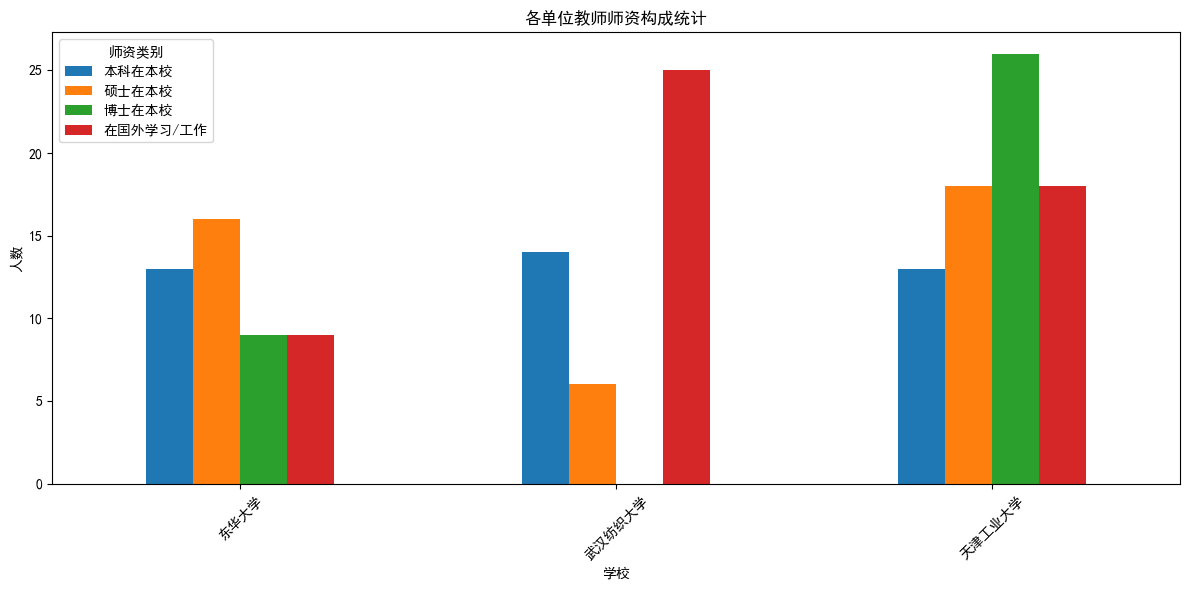

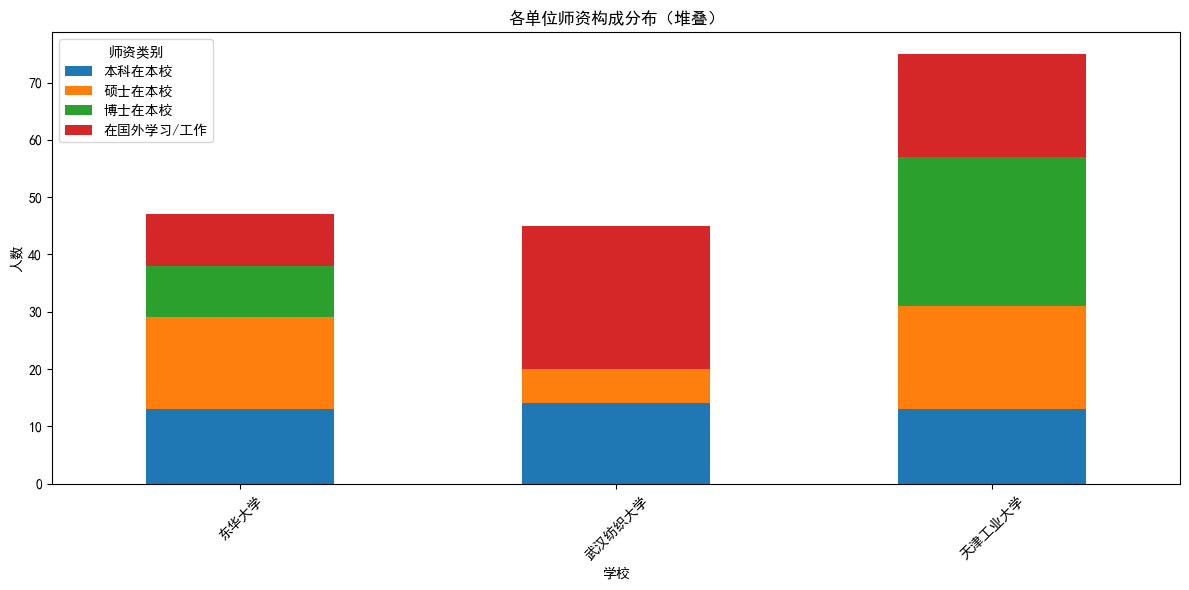

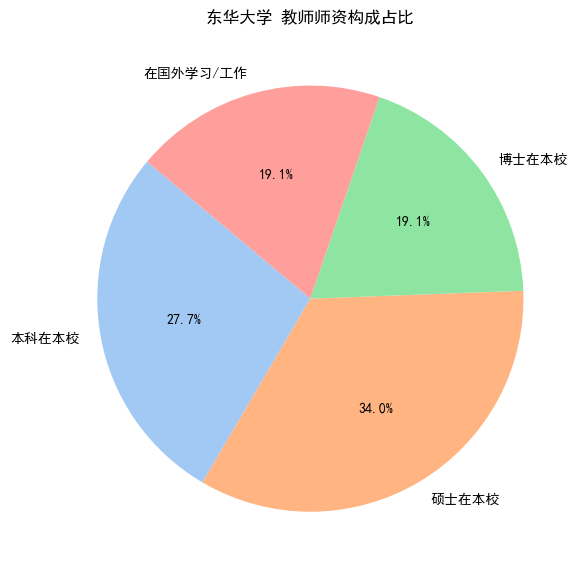

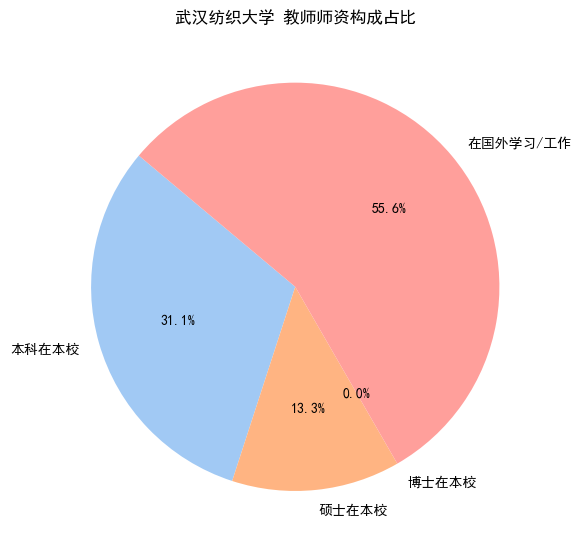

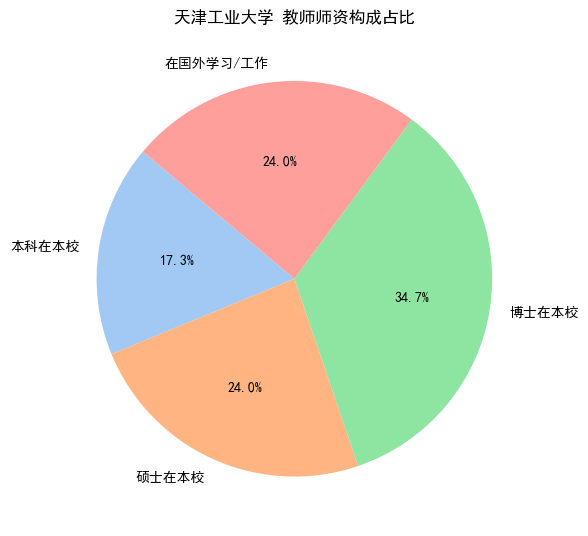

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示字体，解决显示中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 数据准备
results_df = pd.DataFrame(results).T

# 图1: 柱状图 - 展示各学校师资构成
fig, ax = plt.subplots(figsize=(12, 6))
results_df[['本科在本校', '硕士在本校', '博士在本校', '在国外学习/工作']].plot(kind='bar', ax=ax)
plt.title("各单位教师师资构成统计")
plt.xlabel("学校")
plt.ylabel("人数")
plt.legend(title="师资类别")
plt.xticks(rotation=45)
plt.tight_layout()
# 保存图像
plt.savefig('柱状图_各单位教师师资构成统计.png',dpi=600)
plt.show()

# 图2: 堆叠柱状图 - 直观比较不同指标的占比
fig, ax = plt.subplots(figsize=(12, 6))
results_df[['本科在本校', '硕士在本校', '博士在本校', '在国外学习/工作']].plot(kind='bar', stacked=True, ax=ax)
plt.title("各单位师资构成分布（堆叠）")
plt.xlabel("学校")
plt.ylabel("人数")
plt.legend(title="师资类别")
plt.xticks(rotation=45)
plt.tight_layout()
# 保存图像
plt.savefig('堆叠柱状图_各单位师资构成分布.png',dpi=600)
plt.show()

# 图3: 饼图 - 展示每个学校师资分布占比
for uni in results_df.index:
    fig, ax = plt.subplots(figsize=(6, 6))
    data = results_df.loc[uni, ['本科在本校', '硕士在本校', '博士在本校', '在国外学习/工作']]
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f"{uni} 教师师资构成占比")
    plt.tight_layout()
    # 保存图像
    plt.savefig(f'饼图_{uni}_教师师资构成占比.png',dpi=600)
    plt.show()



In [10]:
#查看东华大学的教师中，有多少人在武汉纺织大学和天津工业大学有过学习经历
# 筛选出东华大学的教师
donghua_teachers = df[df['学校'] == '东华大学']

# 定义目标学校
target_schools = ['武汉纺织大学', '天津工业大学']

# 统计有过学习经历的教师人数
# 在本科、硕士、博士院校中查找是否包含目标学校
results = {}
for school in target_schools:
    count = donghua_teachers[
        (donghua_teachers['本科毕业院校'] == school) |
        (donghua_teachers['硕士毕业院校'] == school) |
        (donghua_teachers['博士毕业院校'] == school)
    ].shape[0]
    results[school] = count

# 输出统计结果
for school, count in results.items():
    print(f"在{school}有过学习经历的东华大学教师人数：{count}")


在武汉纺织大学有过学习经历的东华大学教师人数：0
在天津工业大学有过学习经历的东华大学教师人数：2


In [11]:
#查看东华大学的教师中，有多少人在武汉纺织大学和天津工业大学有过学习经历
# 筛选出东华大学的教师
donghua_teachers = df[df['学校'] == '武汉纺织大学']

# 定义目标学校
target_schools = ['东华大学', '天津工业大学']

# 统计有过学习经历的教师人数
# 在本科、硕士、博士院校中查找是否包含目标学校
results = {}
for school in target_schools:
    count = donghua_teachers[
        (donghua_teachers['本科毕业院校'] == school) |
        (donghua_teachers['硕士毕业院校'] == school) |
        (donghua_teachers['博士毕业院校'] == school)
    ].shape[0]
    results[school] = count

# 输出统计结果
for school, count in results.items():
    print(f"在{school}有过学习经历的武汉纺织大学教师人数：{count}")

在东华大学有过学习经历的武汉纺织大学教师人数：18
在天津工业大学有过学习经历的武汉纺织大学教师人数：8


In [12]:
#查看东华大学的教师中，有多少人在武汉纺织大学和天津工业大学有过学习经历
# 筛选出东华大学的教师
donghua_teachers = df[df['学校'] == '天津工业大学']

# 定义目标学校
target_schools = ['东华大学', '武汉纺织大学']

# 统计有过学习经历的教师人数
# 在本科、硕士、博士院校中查找是否包含目标学校
results = {}
for school in target_schools:
    count = donghua_teachers[
        (donghua_teachers['本科毕业院校'] == school) |
        (donghua_teachers['硕士毕业院校'] == school) |
        (donghua_teachers['博士毕业院校'] == school)
    ].shape[0]
    results[school] = count

# 输出统计结果
for school, count in results.items():
    print(f"在{school}有过学习经历的天津工业大学教师人数：{count}")

在东华大学有过学习经历的天津工业大学教师人数：6
在武汉纺织大学有过学习经历的天津工业大学教师人数：1
